# Install and importing packages

In [1]:
!pip install plotly

In [2]:
import pandas as pd
from sklearn.manifold import TSNE, LocallyLinearEmbedding
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
import plotly.express as px
import numpy as np

In [2]:
import pandas as pd

In [3]:
df = pd.read_json('Results/part2.json')

In [4]:
df

,id,headline,text,image_id,anno_ids,text_length,cleaned_text,cleaned_text_nostopwords,summary,summary_embedding,headline_embedding,cleaned_text_embedding,cleaned_text_nostopwords_embedding,text_embedding
0,0,AREA YOUTHS RATE HIGH AT FAIR,The 1969 edition of The Fayette County Fair is...,0,[4],124,the edition of the fayette county fair be now ...,edition fayette county fair history wake excit...,1969 edition of Fayette County Fair is now hi...,"[-0.0412008129, 0.0244849548, 0.0186719485, 0....","[0.056374296500000004, -0.0267446712, 0.051953...","[0.01527292, -0.0219273083, 0.0138875432, -0.0...","[-0.0029716957, -0.019429197500000002, 0.01263...","[-0.0038253102000000002, -0.0263470523, 0.0015..."
1,1,"‘Some excitement, but no big loss!’",Gary Manson seems to be all alone when a small...,0,[7],83,gary manson seem to be all alone when a small ...,gary manson small house farm burn ground tuesd...,Arlington Volunteer Fire Department volunteer...,"[-0.0133755421, 0.09361901880000001, 0.0813418...","[0.026412421800000002, 0.0976366401, 0.0242957...","[0.0504233502, 0.0296050422, 0.0867283568, -0....","[0.013338198, 0.0273821373, 0.0970569029, -0.0...","[0.0535610877, 0.0498270914, 0.0862817392, -0...."
2,2,"‘Life is wonderful, the second time around....!’","ARLINGTON (Special) - On\nSunday, August 24th ...",0,"[9, 10, 11]",221,arlington special on sunday august th the rdbi...,arlington special sunday august th rdbir thday...,Mary Ann Fox celebrated her 103rd birthday wi...,"[0.0147171961, -0.0185735952, 0.02317059970000...","[-0.0420727022, 0.0231407639, 0.1110983267, 0....","[-0.0110445134, -0.020708356100000002, 0.09444...","[0.012216759800000001, -0.0044386336, 0.054196...","[-0.0347905271, -0.013213412800000001, 0.08051..."
3,3,ARLINGTON HAS LOST\nA GOOD FRIEND,"Nettie Perkins, age 73 years\npassed away on W...",0,[13],77,nettie perkin age year pass away on wednesday ...,nettie perkin age year pass away wednesday eve...,"Nettie Perkins, age 73, passed away on Wednes...","[0.0626815706, -0.0038993242, -0.0039537782, 0...","[-0.028832702, 0.050302129200000004, 0.1223330...","[0.0005689807, 0.0314941481, 0.052640236900000...","[-0.0216084756, 0.048307627400000004, 0.047404...","[0.0434597209, -0.0075723198, 0.0259491559, 0...."
4,4,“We're all in our places....!”,"When Mrs, Sandy Quick opened the doors of her ...",0,[16],102,when mrs sandy quick open the door of her kind...,mrs sandy quick open door kindergarten room mo...,When Sandy Quick opened the doors of her kind...,"[0.0209682547, 0.0179063454, 0.0275663957, 0.0...","[0.0517813414, 0.0038907321, 0.0084623462, -0....","[-0.0293667372, 0.0197331421, -0.0098012853, -...","[-0.022943615900000002, 0.041055806, -0.014033...","[-0.026565037700000002, 0.0307019725, -0.02345..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
112,112,Says Barracks\n‘Unnecessary’,-WASHINGTON @ — A house\nwatchdog committee. r...,9,[426],135,washington a house watchdog committee report t...,washington house watchdog committee report day...,"A $370,000 pro-agogue project at Truax Field,...","[0.030615523500000002, 0.06632126120000001, -0...","[0.057624831800000005, 0.08893347530000001, -0...","[-0.0100605888, 0.0160510484, 0.00465904740000...","[0.0176788382, 0.019988682100000002, -0.001833...","[0.00048240850000000004, -0.0032057597, 0.0117..."
113,113,4 Coal Miners\nKilled in Blast,"LANSFORD, Pa. (#—Four min-\ners were killed an...",9,[427],106,lansford pa four min er be kill and seven othe...,lansford pa min er kill seven injure ina blast...,Explosion caught workers be-ginning the night...,"[-0.038570229000000004, 0.061108090000000004, ...","[0.048882734000000004, 0.0910743997, -0.060070...","[0.019938996100000002, 0.0557004996, 0.1110139...","[-0.022028435000000002, 0.032959587900000004, ...","[0.0079011181, 0.060046982000000006, 0.0804016..."
114,114,"interim Pact:\nCovers 10,500\nin Pittsburgh Mu...",PITISBURGH — The CIO\nUnited Steelworkers hav...,9,[431],536,pitisburgh the cio united 

In [4]:
!pip install umap-learn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.7/85.7 kB 888.4 kB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.8/56.8 kB 3.1 MB/s eta 0:00:00


In [5]:
from umap import UMAP

In [6]:
import numpy as np

## Fraction of variance for different number of components
#### The plots show how much variance is explained by the principal components, helping to determine the number of components needed to capture most of the information in the data.

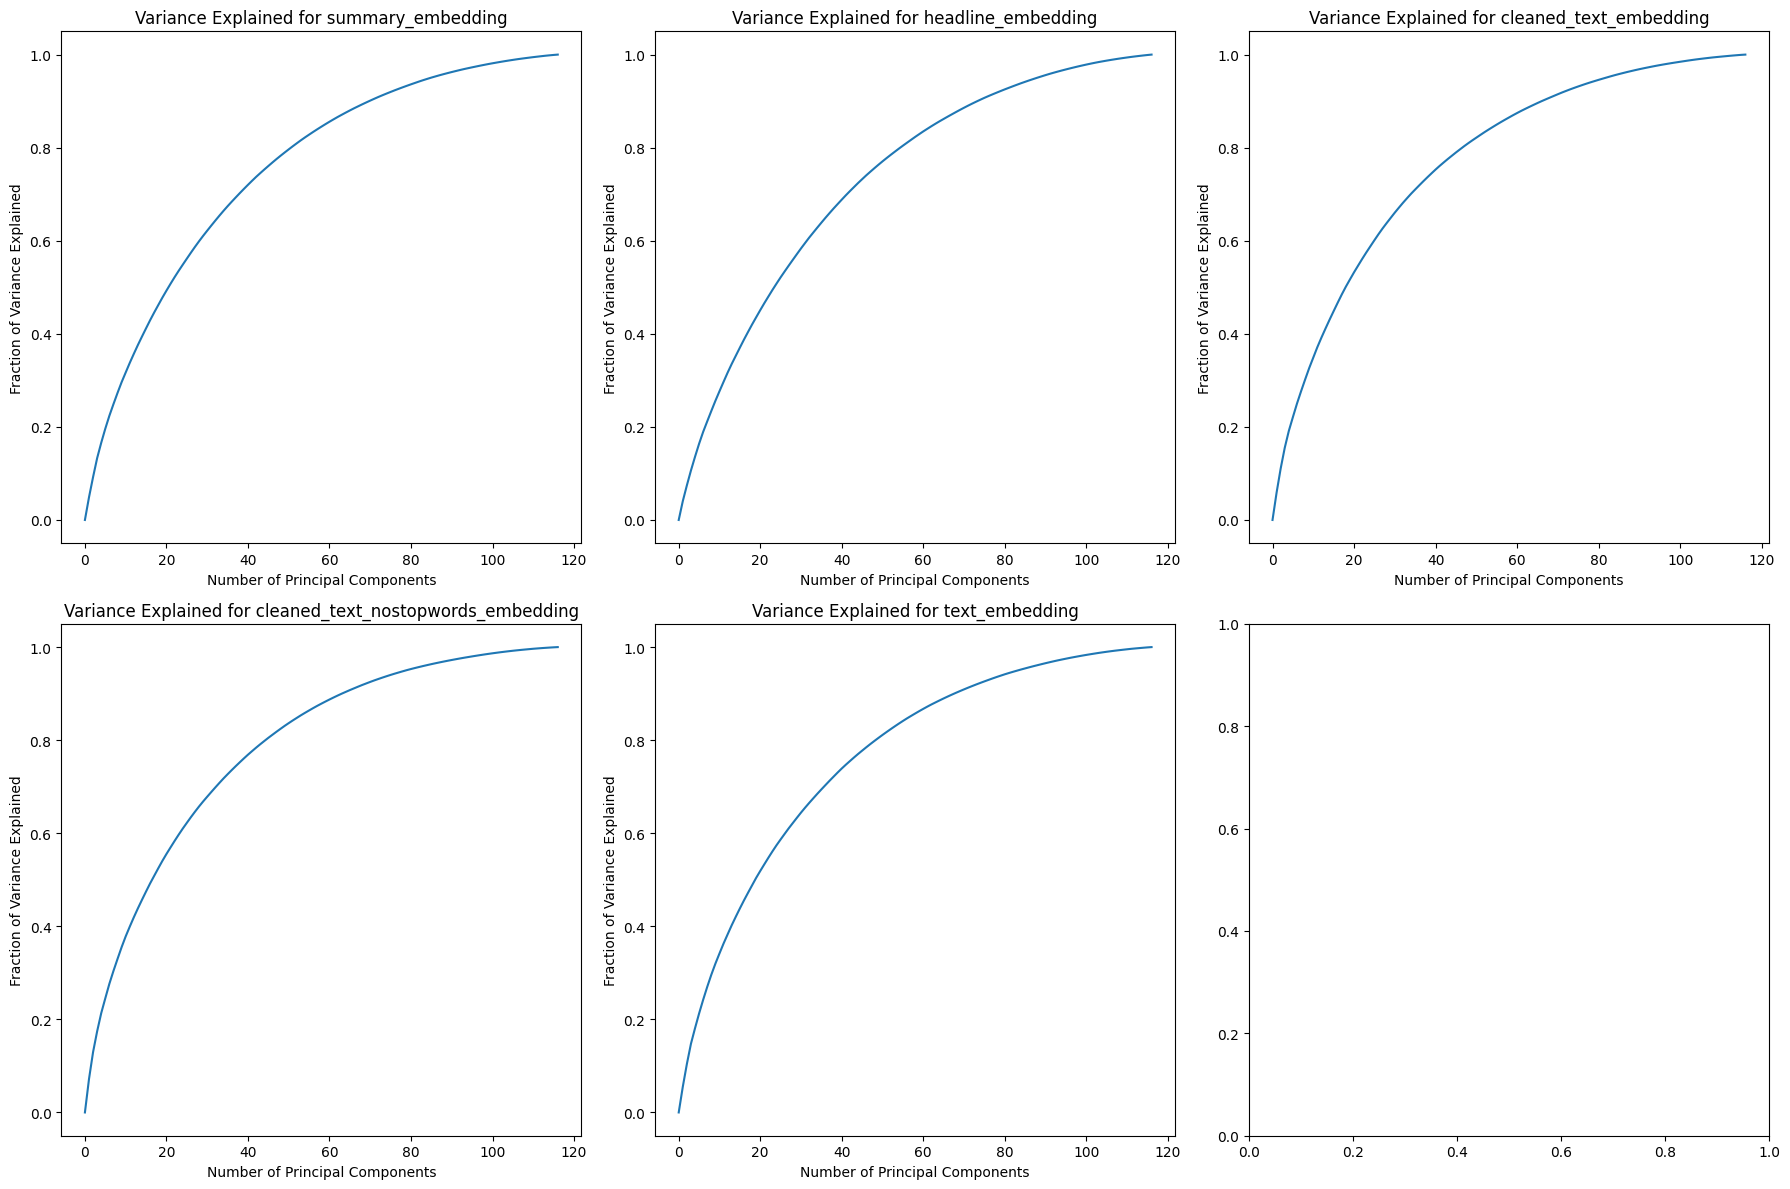

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import TruncatedSVD
from sklearn.preprocessing import StandardScaler

def frac_variance(sigma, k):
    return np.sum(sigma[:k] ** 2) / np.sum(sigma ** 2)

def plot_var(sing_val, ax, title):
    x_range = list(range(len(sing_val)))
    y_range = [frac_variance(sing_val, x) for x in x_range]
    ax.plot(x_range, y_range)
    ax.set_title(title)
    ax.set_xlabel("Number of Principal Components")
    ax.set_ylabel("Fraction of Variance Explained")

# Assuming your dataset is stored in a DataFrame called 'df'
embedding_columns = [col for col in df.columns if col.endswith('_embedding')]

# Create a figure with a 2x3 grid of subplots
fig, axs = plt.subplots(2, 3, figsize=(18, 12))

# Flatten the axs array for easy iteration
axs = axs.flatten()

for i, col in enumerate(embedding_columns):
    if i >= 6:
        break  # Only plot up to 6 embeddings

    text_embeddings = np.array(df[col].tolist())

    # Standardize the data
    scaler = StandardScaler()
    scaled_embeddings = scaler.fit_transform(text_embeddings)

    # Perform Truncated SVD
    svd = TruncatedSVD(n_components=min(text_embeddings.shape[0], text_embeddings.shape[1]))
    svd.fit(scaled_embeddings)

    # Get the singular values
    sing_val = svd.singular_values_

    # Plot the variance explained
    plot_var(sing_val, axs[i], f"Variance Explained for {col}")

# Adjust layout and show the plot
plt.tight_layout()
plt.show()


# 3-D visualisation for our embeddings with dimensonality-reduction

We inspect the following algorithm for every type of embedding:
'PCA', 't-SNE', 'UMAP', 'MD'

In [6]:
import numpy as np

In [9]:
!pip install umap-learn

In [11]:
import plotly.subplots as sp
import plotly.graph_objs as go
from sklearn.decomposition import PCA, TruncatedSVD
from sklearn.manifold import TSNE, LocallyLinearEmbedding
from sklearn.preprocessing import normalize
from umap import UMAP

embedding_columns = [col for col in df.columns if col.endswith('_embedding')]

# algorithms = ['UMAP', 'MD']
algorithms = ['PCA', 't-SNE', 'UMAP', 'MD']

for algo in algorithms:
    fig = sp.make_subplots(rows=2, cols=3, specs=[[{'type': 'scene'} for _ in range(3)] for _ in range(2)],
                           subplot_titles=[f'{algo} - {col}' for col in embedding_columns],
                           vertical_spacing=0.05, horizontal_spacing=0.05)

    for i, col in enumerate(embedding_columns):
        print(f"Visualizing {col} with {algo}")

        # Convert the list of lists to a numpy array
        X = np.array([np.array(x) for x in df[col]])

        if algo == 'PCA':
            reducer = PCA(n_components=3)
        elif algo == 't-SNE':
            reducer = TSNE(n_components=3, random_state=0)
        elif algo == 'UMAP':
            reducer = UMAP(n_components=3)
        elif algo == 'MD':
            X = normalize(X)
            reducer = TruncatedSVD(n_components=3)

        projections = reducer.fit_transform(X)

        proj_df = pd.DataFrame(data=projections, columns=[f'{algo}1', f'{algo}2', f'{algo}3'])
        proj_df['id'] = df['id']

        trace = go.Scatter3d(
            x=proj_df.iloc[:, 0],
            y=proj_df.iloc[:, 1],
            z=proj_df.iloc[:, 2],
            mode='markers',
            marker=dict(
                size=5,
                color=proj_df['id'],
                colorscale='Viridis',
                opacity=0.8
            ),
            text=proj_df['id'],
            hoverinfo='text'
        )

        row = i // 3 + 1
        col = i % 3 + 1

        fig.add_trace(trace, row=row, col=col)

        fig.update_scenes(
            xaxis_title=f'{algo} C 1',
            yaxis_title=f'{algo} C 2',
            zaxis_title=f'{algo} C 3',
            row=row,
            col=col
        )

    fig.update_layout(height=800, width=1200, title_text=f'{algo} Dimensionality Reduction Projections')
    fig.show()

Visualizing summary_embedding with PCA
Visualizing headline_embedding with PCA
Visualizing cleaned_text_embedding with PCA
Visualizing cleaned_text_nostopwords_embedding with PCA
Visualizing text_embedding with PCA


Visualizing summary_embedding with t-SNE
Visualizing headline_embedding with t-SNE
Visualizing cleaned_text_embedding with t-SNE
Visualizing cleaned_text_nostopwords_embedding with t-SNE
Visualizing text_embedding with t-SNE


Visualizing summary_embedding with UMAP
Visualizing headline_embedding with UMAP
Visualizing cleaned_text_embedding with UMAP
Visualizing cleaned_text_nostopwords_embedding with UMAP
Visualizing text_embedding with UMAP


Visualizing summary_embedding with MD
Visualizing headline_embedding with MD
Visualizing cleaned_text_embedding with MD
Visualizing cleaned_text_nostopwords_embedding with MD
Visualizing text_embedding with MD


In [111]:
import plotly.subplots as sp
import plotly.graph_objs as go
from sklearn.decomposition import PCA, TruncatedSVD
from sklearn.manifold import TSNE
from umap import UMAP
from sklearn.preprocessing import normalize
import numpy as np
import pandas as pd

# Assuming you have a DataFrame 'df' with a column 'text_embedding'
X = np.array([np.array(embedding) for embedding in df['text_embedding'].values])

# Define the dimensionality reduction algorithms
algorithms = ['PCA', 't-SNE', 'UMAP', 'MD']
reducers = [
    PCA(n_components=3),
    TSNE(n_components=3, random_state=0),
    UMAP(n_components=3),
    TruncatedSVD(n_components=3)
]

# Create a figure with subplots
fig = sp.make_subplots(rows=2, cols=2, specs=[[{'type': 'scene'}, {'type': 'scene'}],
                                              [{'type': 'scene'}, {'type': 'scene'}]],
                       subplot_titles=[f'{algo} Projection' for algo in algorithms])

# Iterate over the algorithms and plot the projections
for i, (algo, reducer) in enumerate(zip(algorithms, reducers)):
    print(f"Visualizing {algo} Projection")

    if algo == 'MD':
        X_normalized = normalize(X)
        projections = reducer.fit_transform(X_normalized)
    else:
        projections = reducer.fit_transform(X)

    proj_df = pd.DataFrame(data=projections, columns=[f'{algo}1', f'{algo}2', f'{algo}3'])
    proj_df['id'] = df['id']

    trace = go.Scatter3d(
        x=proj_df.iloc[:, 0],
        y=proj_df.iloc[:, 1],
        z=proj_df.iloc[:, 2],
        mode='markers',
        marker=dict(
            size=5,
            color=proj_df['id'],
            colorscale='Viridis',
            opacity=0.8
        ),
        text=proj_df['id'],
        hoverinfo='text'
    )

    row = (i // 2) + 1
    col = (i % 2) + 1

    fig.add_trace(trace, row=row, col=col)

    fig.update_scenes(
        xaxis_title=f'{algo} C 1',
        yaxis_title=f'{algo} C 2',
        zaxis_title=f'{algo} C 3',
        row=row,
        col=col
    )

fig.update_layout(height=800, width=1200, title_text='Dimensionality Reduction Projections for text_embedding')
fig.show()

Visualizing PCA Projection
Visualizing t-SNE Projection
Visualizing UMAP Projection
Visualizing MD Projection


## 2-D visualisation along with stress

## Stress
$$\Lambda_S=\left(\frac{\sum_{i,j}(||\mathbf{d}_{ij}||-||\mathbf{\tilde{d}}_{ij}||)^2}{\sum_{i,j}||\mathbf{d}_{ij}||^2}\right)^\frac{1}{2}$$
Stress measures how well the original distances are preserved by the embedding. Lower the stress, better it is.

Visualizing summary_embedding


/usr/local/lib/python3.10/dist-packages/umap/umap_.py:1945: UserWarning:

n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.



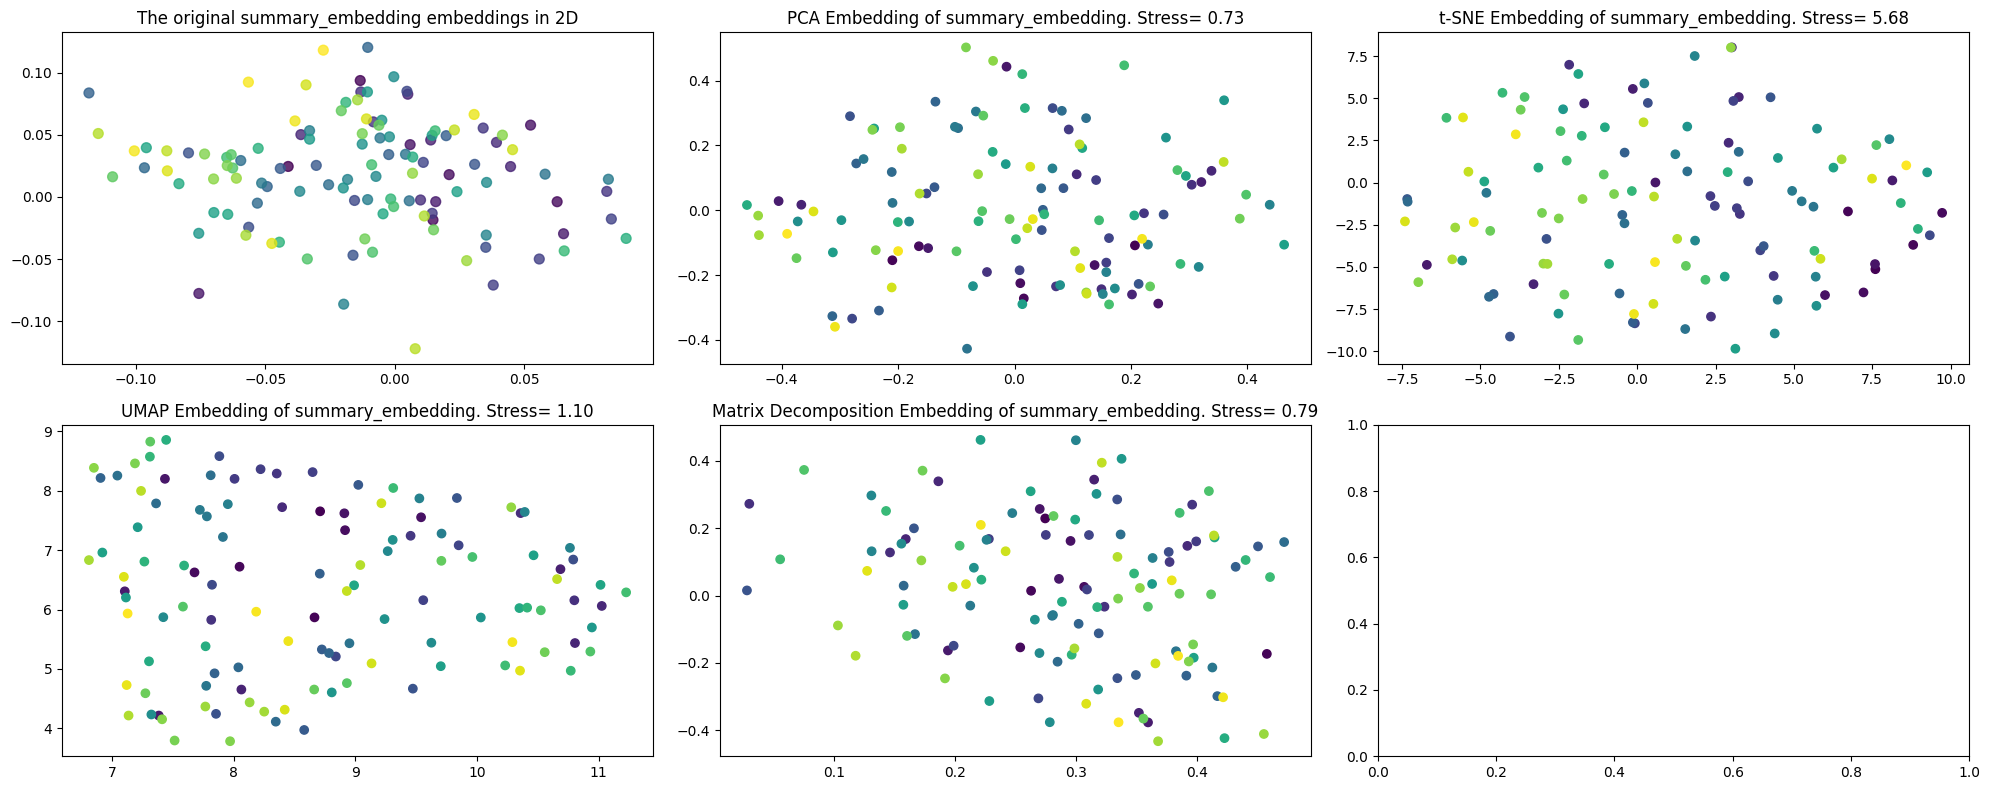

Visualizing headline_embedding


/usr/local/lib/python3.10/dist-packages/umap/umap_.py:1945: UserWarning:

n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.



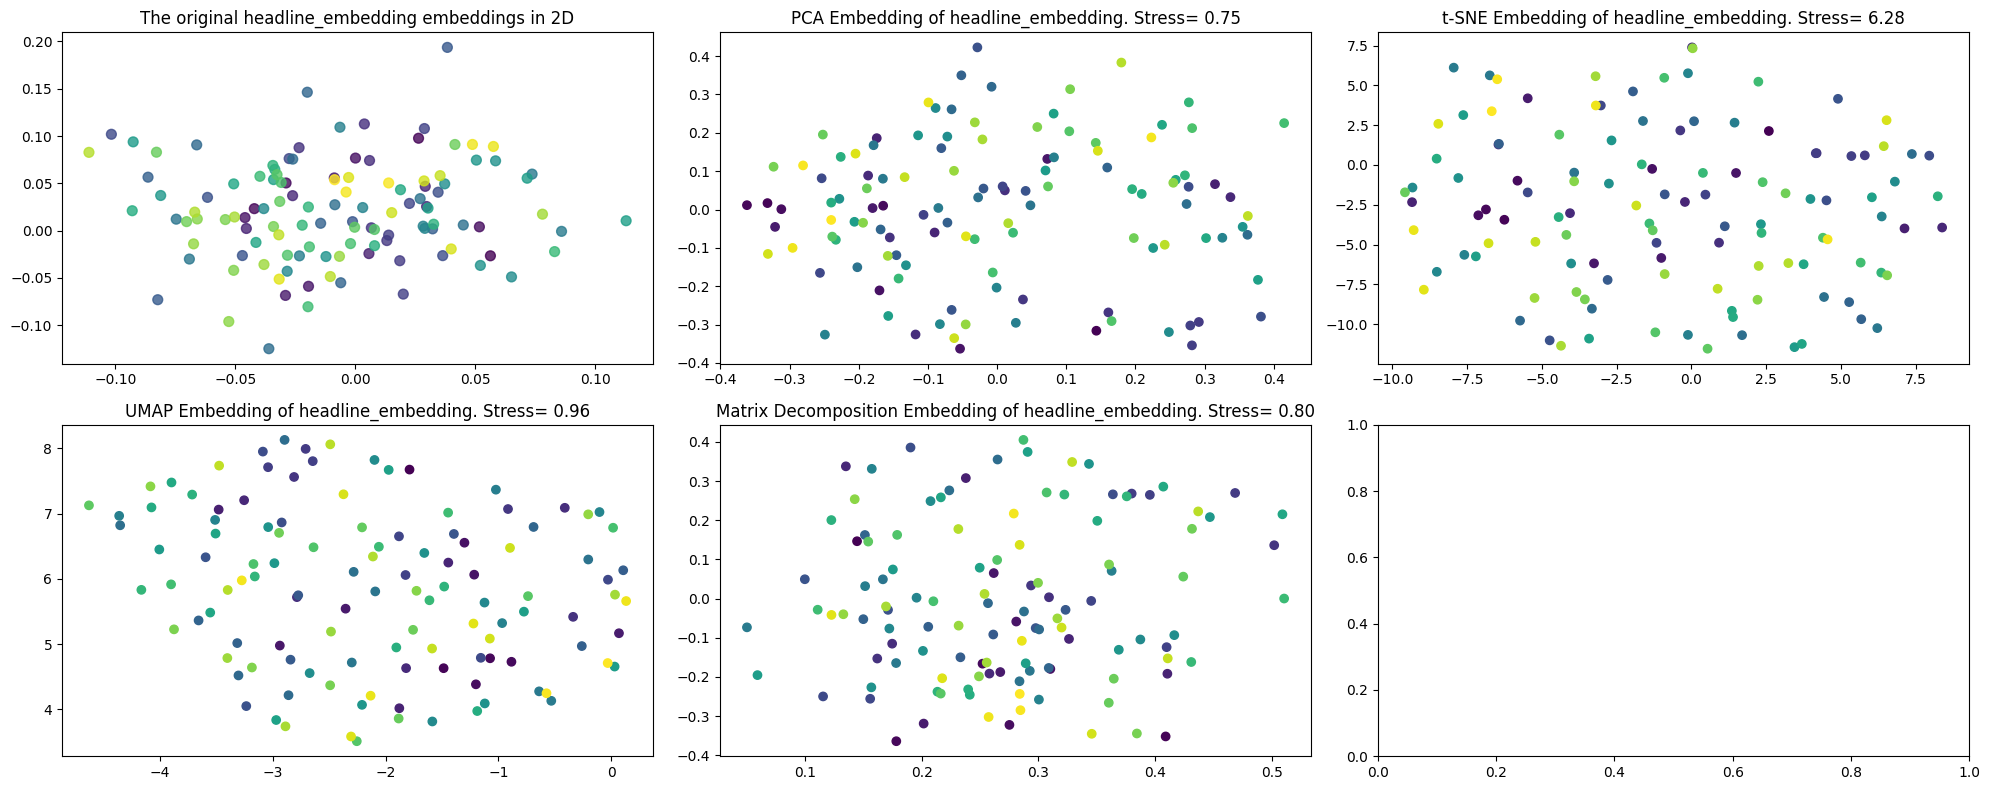

Visualizing cleaned_text_embedding


/usr/local/lib/python3.10/dist-packages/umap/umap_.py:1945: UserWarning:

n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.



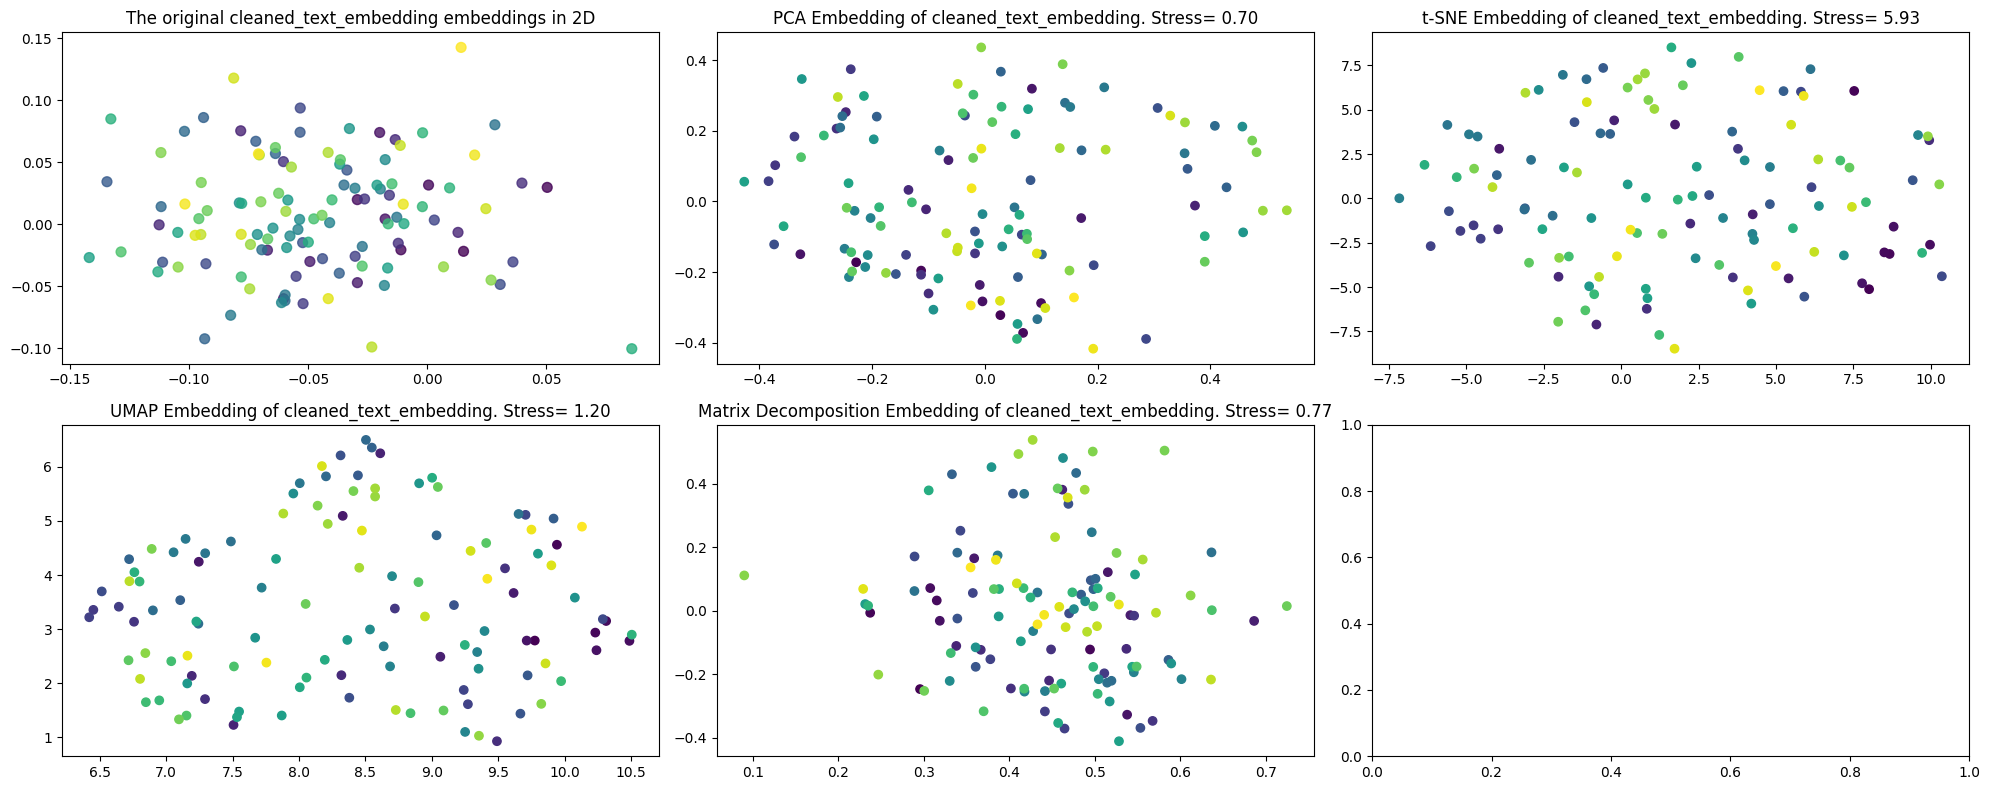

Visualizing cleaned_text_nostopwords_embedding


/usr/local/lib/python3.10/dist-packages/umap/umap_.py:1945: UserWarning:

n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.



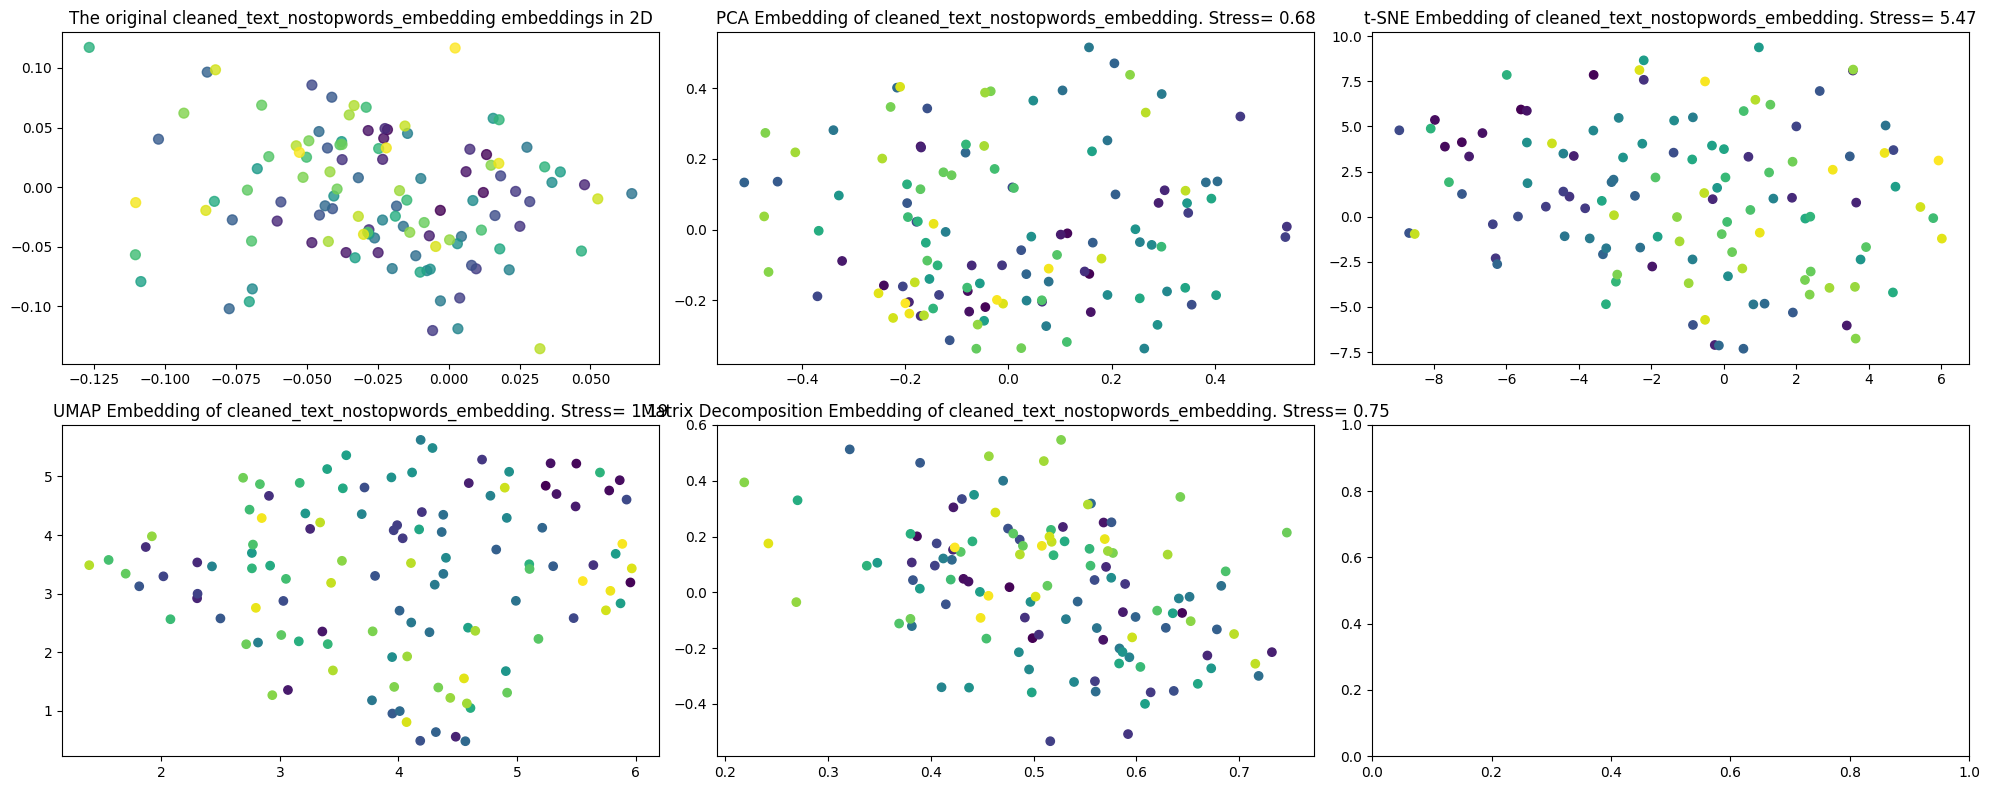

Visualizing text_embedding


/usr/local/lib/python3.10/dist-packages/umap/umap_.py:1945: UserWarning:

n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.



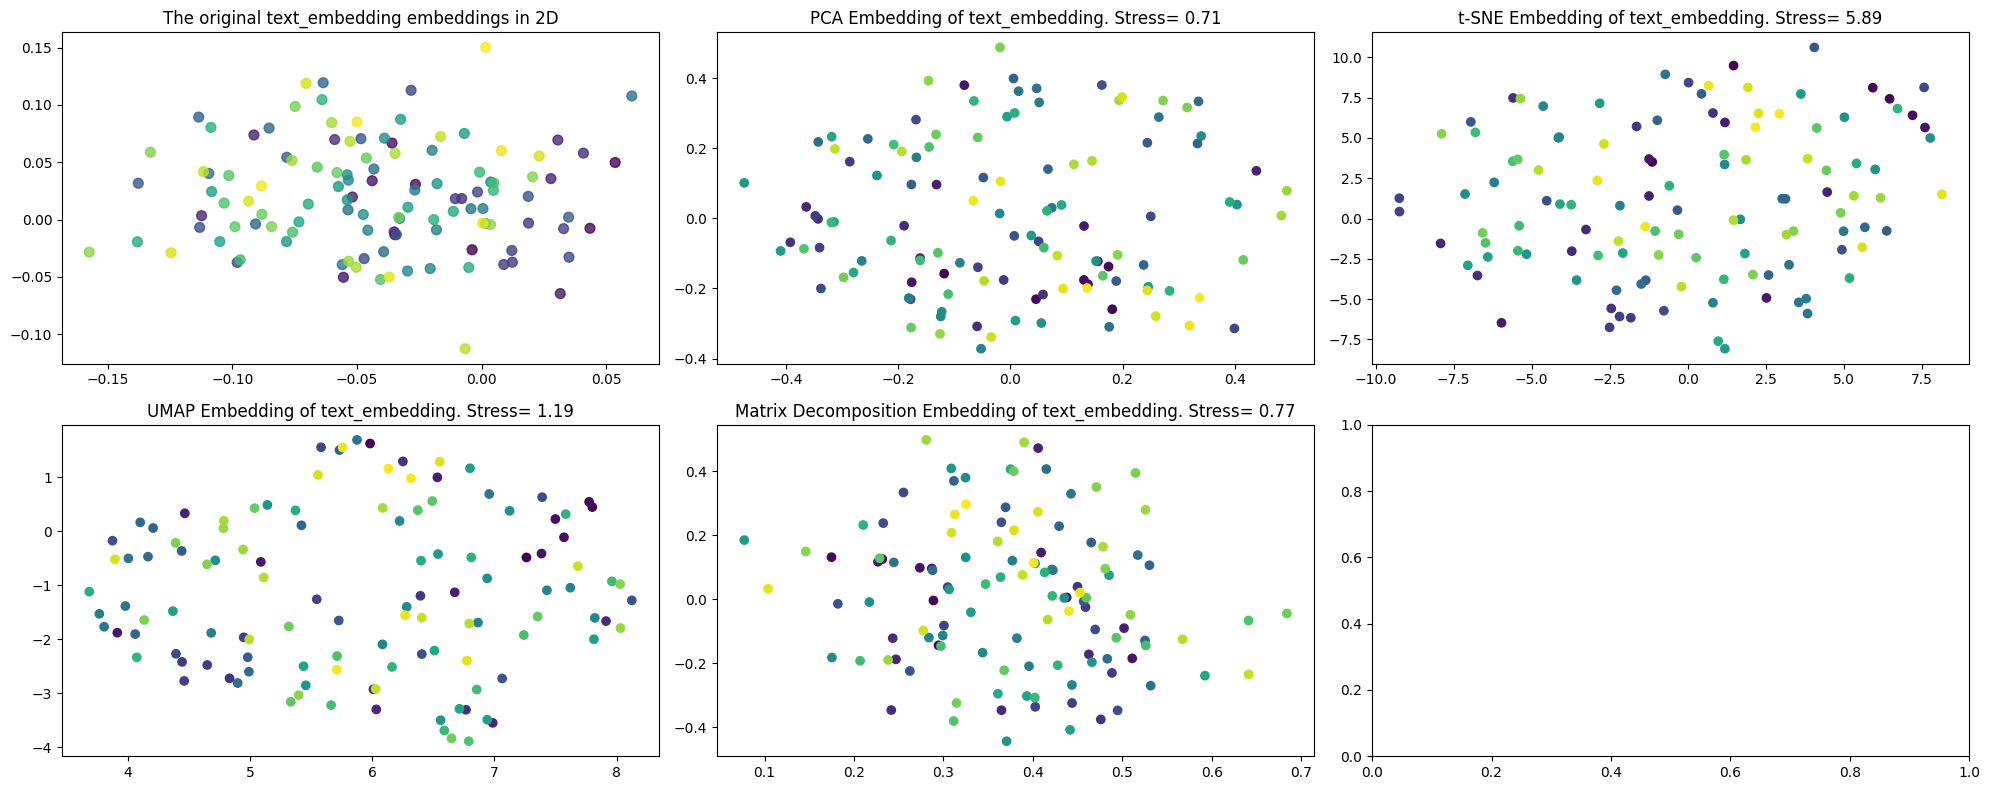

In [11]:
import pandas as pd
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA, TruncatedSVD
from sklearn.metrics import pairwise_distances
# from umap import UMAP
import matplotlib.pyplot as plt
import numpy as np

def stress(orig_dist, proj_dist):
    return np.sqrt(np.sum((orig_dist - proj_dist)**2) / np.sum(orig_dist**2))

# Assuming your dataframe is named 'df'
embedding_columns = [col for col in df.columns if col.endswith('_embedding')]

for col in embedding_columns:
    print(f"Visualizing {col}")
    embeddings = np.array([np.array(x) for x in df[col]])

    pca = PCA(n_components=2)
    pca_embeddings = pca.fit_transform(embeddings)
    orig_dist = pairwise_distances(embeddings)
    proj_dist_pca = pairwise_distances(pca_embeddings)
    pca_stress = stress(orig_dist, proj_dist_pca)

    tsne = TSNE(n_components=2, random_state=42)
    tsne_embeddings = tsne.fit_transform(embeddings)
    proj_dist_tsne = pairwise_distances(tsne_embeddings)
    tsne_stress = stress(orig_dist, proj_dist_tsne)

    umap = UMAP(n_components=2, random_state=42)
    umap_embeddings = umap.fit_transform(embeddings)
    proj_dist_umap = pairwise_distances(umap_embeddings)
    umap_stress = stress(orig_dist, proj_dist_umap)

    matrix_decomp = TruncatedSVD(n_components=2)
    matrix_decomp_embeddings = matrix_decomp.fit_transform(embeddings)
    proj_dist_matrix_decomp = pairwise_distances(matrix_decomp_embeddings)
    matrix_decomp_stress = stress(orig_dist, proj_dist_matrix_decomp)


    fig, axs = plt.subplots(figsize=(20, 8), nrows=2, ncols=3)

    axs[0, 0].scatter(embeddings[:, 0], embeddings[:, 1], c=df['id'], s=50, alpha=0.8)
    axs[0, 0].set_title(f"The original {col} embeddings in 2D")

    axs[0, 1].scatter(pca_embeddings[:, 0], pca_embeddings[:, 1], c=df['id'])
    axs[0, 1].set_title(f"PCA Embedding of {col}. Stress= {pca_stress:0.2f}")

    axs[0, 2].scatter(tsne_embeddings[:, 0], tsne_embeddings[:, 1], c=df['id'])
    axs[0, 2].set_title(f"t-SNE Embedding of {col}. Stress= {tsne_stress:0.2f}")

    axs[1, 0].scatter(umap_embeddings[:, 0], umap_embeddings[:, 1], c=df['id'])
    axs[1, 0].set_title(f"UMAP Embedding of {col}. Stress= {umap_stress:0.2f}")

    axs[1, 1].scatter(matrix_decomp_embeddings[:, 0], matrix_decomp_embeddings[:, 1], c=df['id'])
    axs[1, 1].set_title(f"Matrix Decomposition Embedding of {col}. Stress= {matrix_decomp_stress:0.2f}")

    plt.tight_layout()
    plt.show()

## Comparing Stress values for different number of components (2,3) for various algorithms

In [115]:
import plotly.subplots as sp
import plotly.graph_objs as go
from sklearn.decomposition import PCA, TruncatedSVD
from sklearn.manifold import TSNE
from umap import UMAP
from sklearn.preprocessing import normalize
import numpy as np
import pandas as pd
from sklearn.metrics import pairwise_distances

def stress(orig_dist, proj_dist):
    return np.sqrt(np.sum((orig_dist - proj_dist)**2) / np.sum(orig_dist**2))

# Assuming you have a DataFrame 'df' with a column 'text_embedding'
X = np.array([np.array(embedding) for embedding in df['text_embedding'].values])

# Define the dimensionality reduction algorithms
algorithms = ['PCA', 't-SNE', 'UMAP', 'MD']
reducers = [
    PCA(n_components=3),
    TSNE(n_components=3, random_state=42),
    UMAP(n_components=3),
    TruncatedSVD(n_components=3)
]

# Calculate the original pairwise distances
orig_dist = pairwise_distances(X)

# Iterate over the algorithms and print the stress values
for algo, reducer in zip(algorithms, reducers):
    print(f"{algo} Stress Values:")

    for n_components in range(2, 4):
        projections = reducer.fit_transform(X)[:, :n_components]
        proj_dist = pairwise_distances(projections)
        stress_value = stress(orig_dist, proj_dist)
        print(f"Components: {n_components}, Stress: {stress_value:.4f}")

    print()

PCA Stress Values:
Components: 2, Stress: 0.7056
Components: 3, Stress: 0.6351

t-SNE Stress Values:
Components: 2, Stress: 89.7238
Components: 3, Stress: 109.6772

UMAP Stress Values:
Components: 2, Stress: 0.6312
Components: 3, Stress: 0.8479

MD Stress Values:
Components: 2, Stress: 0.7691
Components: 3, Stress: 0.6846



In [12]:
!pip install hdbscan

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.2/5.2 MB 14.6 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Using cached Cython-0.29.37-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.manylinux_2_24_x86_64.whl (1.9 MB)
  Created wheel for hdbscan: filename=hdbscan-0.8.33-cp310-cp310-linux_x86_64.whl size=3039283 sha256=17c34379419155f0c005fc9778db5a2a384f277151d426f56b01958b3a1da39f
  Stored in directory: /root/.cache/pip/wheels/75/0b/3b/dc4f60b7cc455efaefb62883a7483e76f09d06ca81cf87d610
Successfully built hdbscan
  Attempting uninstall: cython
    Found existing installation: Cython 3.0.10
    Uninstalling Cython-3.0.10:
      Successfully uninstalled Cython-3.0.10


In [2]:
!pip install umap-learn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.7/85.7 kB 1.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.8/56.8 kB 5.0 MB/s eta 0:00:00


In [4]:
!pip install hdbscan

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.2/5.2 MB 18.1 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Using cached Cython-0.29.37-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.manylinux_2_24_x86_64.whl (1.9 MB)
  Created wheel for hdbscan: filename=hdbscan-0.8.33-cp310-cp310-linux_x86_64.whl size=3039288 sha256=a126467b632824dfa05368d2e51f021d47fb480f94efea493efd0fb3f065e2b3
  Stored in directory: /root/.cache/pip/wheels/75/0b/3b/dc4f60b7cc455efaefb62883a7483e76f09d06ca81cf87d610
Successfully built hdbscan
  Attempting uninstall: cython
    Found existing installation: Cython 3.0.10
    Uninstalling Cython-3.0.10:
      Successfully uninstalled Cython-3.0.10


## Clustering Using BERTopic (UMAP+HDBSCAN)

In [7]:
df = pd.read_json("part2.json")

In [ ]:
!pip install bertopic

In [12]:
import pandas as pd
import numpy as np
import umap
from bertopic import BERTopic
from typing import Optional, List


In [84]:
from sklearn.feature_extraction.text import CountVectorizer

In [ ]:
{'min_cluster_size': 4, 'n_components': 2, 'n_neighbors': 5, 'random_state': 42} #Best params Calculated from last section

In [86]:
from sentence_transformers import SentenceTransformer

In [87]:
sentence_model = SentenceTransformer("all-MiniLM-L6-v2")

In [94]:
import spacy
nlp = spacy.load('en_core_web_sm')
stop_words = list(nlp.Defaults.stop_words)
vectorizer_model = CountVectorizer(ngram_range=(1,2),
                                   stop_words=stop_words)

In [111]:
import pandas as pd
import numpy as np
from bertopic import BERTopic
from hdbscan import HDBSCAN

# Assuming you have your DataFrame 'df' with columns "text" and "text_embedding"

# Convert the "text_embedding" column to a list of lists
embeddings = df["cleaned_text_nostopwords_embedding"].tolist()

# Convert the embeddings to a numpy array
embeddings = np.array(embeddings)

# Get the corresponding text from the "text" column
docs = df["cleaned_text_nostopwords"].tolist()

# Create an instance of the HDBSCAN clustering model
cluster_model = HDBSCAN(min_cluster_size=4, metric='euclidean', cluster_selection_method='leaf', prediction_data=False)

# Create BERTopic
topic_model = BERTopic(embedding_model=sentence_model, language='English',
                       verbose=True,
                       vectorizer_model = vectorizer_model,
                       n_gram_range=(1,2), hdbscan_model=cluster_model)

topic_model.fit(docs, embeddings)

# Run the visualization with the original embeddings
topic_model.visualize_documents(docs, embeddings=embeddings)

2024-05-21 16:55:59,033 - BERTopic - Dimensionality - Fitting the dimensionality reduction algorithm
2024-05-21 16:56:09,184 - BERTopic - Dimensionality - Completed ✓
2024-05-21 16:56:09,187 - BERTopic - Cluster - Start clustering the reduced embeddings
2024-05-21 16:56:09,200 - BERTopic - Cluster - Completed ✓
2024-05-21 16:56:09,212 - BERTopic - Representation - Extracting topics from clusters using representation models.
2024-05-21 16:56:09,617 - BERTopic - Representation - Completed ✓


### Reduced embeddings with UMAP

In [112]:
# Reduce dimensionality of embeddings, this step is optional but much faster to perform iteratively:
from umap import UMAP
reduced_embeddings = UMAP(n_neighbors=5, n_components=2, random_state= 42, min_dist=0.0, metric='cosine').fit_transform(embeddings)
topic_model.visualize_documents(docs, reduced_embeddings=reduced_embeddings)

In [113]:
freq = topic_model.get_topic_info(); freq

,Topic,Count,Name,Representation,Representative_Docs
0,-1,43,-1_president_inch_today_new,"[president, inch, today, new, report, day, air...",[washington phint ma jor american development ...
1,0,15,0_school_mrs_student_bomb,"[school, mrs, student, bomb, high, child, high...",[successful muscallne united way cam palgn hol...
2,1,12,1_price_year_cost_myers,"[price, year, cost, myers, cat, bill, cent, wa...",[cost living council say conduct thorough audi...
3,2,10,2_lake_shore_city_tonight,"[lake, shore, city, tonight, traffic, low, lak...",[grant ta city del riu approve week texas traf...
4,3,9,3_voter_precinct_vote_state,"[voter, precinct, vote, state, report, electio...",[generally mild weather greet texas voter tues...
5,4,8,4_arrest_police_burn_cause,"[arrest, police, burn, cause, smith, power, la...",[rock island til ap rock island county states ...
6,5,6,5_world_offer_united_suez,"[world, offer, united, suez, egypt, acheson, d...",[washington ap secre tary state dulle charge t...
7,6,5,6_lorge_convention_president_decision,"[lorge, convention, president, decision, presi...",[washington ins labor secretary tobin urge con...
8,7,5,7_korea_brazilian_communist_crash,"[korea, brazilian, communist, crash, united, s...",[ belem brazil pf captive reportedly turn eap...
9,8,4,8_mitchell_magruder_president_plan,"[mitchell, magruder, president, plan, testify,...",[washington ap lead py presidnet nixon nation ...


In [114]:
freq = topic_model.get_topic_freq()
print(freq)
print('Num of topics:',len(freq))

   Topic  Count
0     -1     43
2      0     15
5      1     12
6      2     10
7      3      9
1      4      8
4      5      6
3      6      5
8      7      5
9      8      4
Num of topics: 10


In [115]:
topic_model.topics_[:10]

[-1, 4, 0, 0, 0, 0, -1, 6, -1, 0]

In [116]:
topic_model.visualize_topics()

In [117]:
topic_model.visualize_distribution(probs[116], min_probability=0)

In [118]:
topic_model.visualize_hierarchy(top_n_topics=50)

In [119]:
new_topics = topic_model.reduce_outliers(docs, topics, strategy="embeddings")

from collections import Counter
new_topic_dict = dict(Counter(new_topics))

# Use the get method to safely access the number of outliers
num_outliers = new_topic_dict.get(-1, 0)
print('Num of outliers:', num_outliers)

Num of outliers: 0


In [121]:
topic_model.visualize_barchart()

In [122]:
topic_model.visualize_heatmap()

In [124]:
#create topic label using keywords
topic_labels = topic_model.generate_topic_labels(separator='/', topic_prefix=False)
topic_labels[0] = 'outliers'
topic_label_dict = dict(zip([i for i in range(-1,15)],topic_labels))
print(topic_label_dict)



{-1: 'outliers', 0: 'school/mrs/student', 1: 'price/year/cost', 2: 'lake/shore/city', 3: 'voter/precinct/vote', 4: 'arrest/police/burn', 5: 'world/offer/united', 6: 'lorge/convention/president', 7: 'korea/brazilian/communist', 8: 'mitchell/magruder/president'}


## Updating models with no outliers

In [125]:
topic_model.update_topics(docs, topics=new_topics)

2024-05-21 17:02:52,864 - BERTopic - WARNING: Using a custom list of topic assignments may lead to errors if topic reduction techniques are used afterwards. Make sure that manually assigning topics is the last step in the pipeline.Note that topic embeddings will also be created through weightedc-TF-IDF embeddings instead of centroid embeddings.


In [126]:
freq = topic_model.get_topic_info(); freq

,Topic,Count,Name,Representation,Representative_Docs
0,0,49,0_say_school_year_price,"[say, school, year, price, cent, state, mrs, s...",[successful muscallne united way cam palgn hol...
1,1,19,1_say_myers_cat_communist,"[say, myers, cat, communist, island, today, un...",[cost living council say conduct thorough audi...
2,2,13,2_inch_rain_today_lake,"[inch, rain, today, lake, shower, texas, state...",[grant ta city del riu approve week texas traf...
3,3,6,3_voter_precinct_vote_ballot,"[voter, precinct, vote, ballot, report, cast, ...",[generally mild weather greet texas voter tues...
4,4,12,4_say_man_miner_rock,"[say, man, miner, rock, coal, kill, rescue, ex...",[rock island til ap rock island county states ...
5,5,1,5_egypt_dam_nasser_soviet,"[egypt, dam, nasser, soviet, sudan, offer, can...",[washington ap secre tary state dulle charge t...
6,6,4,6_lorge_convention_decision_court,"[lorge, convention, decision, court, tell, abo...",[washington ins labor secretary tobin urge con...
7,7,3,7_air_india japanese_pen_india,"[air, india japanese, pen, india, intercept, j...",[ belem brazil pf captive reportedly turn eap...
8,8,10,8_johnson_president_say_mitchell,"[johnson, president, say, mitchell, atomic, na...",[washington ap lead py presidnet nixon nation ...


In [127]:
topic_model.visualize_documents(docs, embeddings=embeddings)

### Reduced embeddings with UMAP

In [128]:
reduced_embeddings = UMAP(n_neighbors=5, n_components=2, random_state= 42, min_dist=0.0, metric='cosine').fit_transform(embeddings)
topic_model.visualize_documents(docs, reduced_embeddings=reduced_embeddings)

In [130]:
topic_model.visualize_topics()

In [131]:
topic_model.visualize_hierarchy(top_n_topics=50)

In [132]:
topic_model.visualize_barchart()

In [133]:
topic_model.visualize_heatmap()

# LDA using Genism

In [ ]:
!pip install seaborn

  Using cached seaborn-0.13.2-py3-none-any.whl.metadata (5.4 kB)
Using cached seaborn-0.13.2-py3-none-any.whl (294 kB)


In [ ]:
!pip install gensim

In [ ]:
import gensim
from gensim.utils import simple_preprocess
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

# Define stop words
stop_words = stopwords.words('english')
stop_words.extend(['said', 'will', 'would', 'could', 'today', 'new', 'one', 'first', 'last', 'years', 'also', 'may', 'two', 'three', 'around', 'ap', 'er', 're', 'ing', 'Mr', 'Dr'])

def sent_to_words(sentences):
    for sentence in sentences:
        # deacc=True removes punctuations
        yield(gensim.utils.simple_preprocess(str(sentence), deacc=True))

def remove_stopwords(texts):
    return [[word for word in simple_preprocess(str(doc))
             if word not in stop_words] for doc in texts]



# Apply the functions to the 'text' column
data = df['text'].values.tolist()
data_words = list(sent_to_words(data))
data_words = remove_stopwords(data_words)

# Print the first 30 words of the first row
print(data_words[0][:30])


['edition', 'fayette', 'county', 'fair', 'history', 'wake', 'exciting', 'week', 'west', 'union', 'young', 'people', 'area', 'awards', 'show', 'prize', 'winning', 'ability', 'various', 'catagories', 'showmanship', 'proud', 'young', 'people', 'shown', 'photos', 'ten', 'already', 'experienced', 'showman']


[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/ananyahooda/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
import gensim.corpora as corpora
# Create Dictionary
id2word = corpora.Dictionary(data_words)
# Create Corpus
texts = data_words
# Term Document Frequency
corpus = [id2word.doc2bow(text) for text in texts]
# View
print(corpus[:1][0][:30])

[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1), (6, 1), (7, 1), (8, 2), (9, 1), (10, 1), (11, 1), (12, 2), (13, 1), (14, 1), (15, 1), (16, 1), (17, 1), (18, 1), (19, 1), (20, 2), (21, 1), (22, 1), (23, 1), (24, 2), (25, 1), (26, 1), (27, 3), (28, 1), (29, 1)]


In [ ]:
from pprint import pprint
# number of topics
num_topics = 10
# Build LDA model
lda_model = gensim.models.LdaMulticore(corpus=corpus,
                                       id2word=id2word,
                                       num_topics=num_topics)
# Print the Keyword in the 10 topics
pprint(lda_model.print_topics())
doc_lda = lda_model[corpus]

[(0,
  '0.003*"year" + 0.003*"mitchell" + 0.003*"mine" + 0.003*"per" + '
  '0.002*"state" + 0.002*"increase" + 0.002*"cent" + 0.002*"air" + '
  '0.002*"school" + 0.002*"president"'),
 (1,
  '0.004*"state" + 0.004*"year" + 0.003*"lake" + 0.003*"school" + '
  '0.003*"house" + 0.002*"time" + 0.002*"students" + 0.002*"county" + '
  '0.002*"four" + 0.002*"president"'),
 (2,
  '0.004*"mrs" + 0.004*"city" + 0.003*"precinct" + 0.003*"school" + '
  '0.002*"reported" + 0.002*"year" + 0.002*"cost" + 0.002*"billion" + '
  '0.002*"motor" + 0.002*"president"'),
 (3,
  '0.007*"school" + 0.004*"precinct" + 0.004*"president" + 0.003*"year" + '
  '0.003*"state" + 0.002*"reported" + 0.002*"way" + 0.002*"high" + 0.002*"per" '
  '+ 0.002*"city"'),
 (4,
  '0.005*"house" + 0.005*"president" + 0.003*"senate" + 0.003*"state" + '
  '0.003*"atomic" + 0.003*"day" + 0.003*"war" + 0.002*"johnson" + '
  '0.002*"hospital" + 0.002*"mrs"'),
 (5,
  '0.004*"year" + 0.004*"president" + 0.003*"house" + 0.003*"city" + '
  '

In [ ]:
!pip install pyLDAvis

In [ ]:
!pip install pandas==1.5.3

In [ ]:
import pandas as pd

In [ ]:
print(pd. __version__)

1.5.3


In [ ]:
import pyLDAvis.gensim
import pickle
import pyLDAvis

# Visualize the topics
pyLDAvis.enable_notebook()
LDAvis_data_filepath = os.path.join('lda'+str(num_topics))

# # this is a bit time consuming - make the if statement True
# # if you want to execute visualization prep yourself
if 1 == 1:
    LDAvis_prepared = pyLDAvis.gensim.prepare(lda_model, corpus, id2word)
    with open(LDAvis_data_filepath, 'wb') as f:
        pickle.dump(LDAvis_prepared, f)

# load the pre-prepared pyLDAvis data from disk
with open(LDAvis_data_filepath, 'rb') as f:
    LDAvis_prepared = pickle.load(f)

pyLDAvis.save_html(LDAvis_prepared, 'lda'+ str(num_topics) +'.html')
LDAvis_prepared


/opt/homebrew/Caskroom/miniforge/base/envs/newspaper/lib/python3.8/site-packages/pyLDAvis/_prepare.py:243: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  default_term_info = default_term_info.sort_values(


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
4     -0.008956  0.038741       1        1  14.964237
5      0.028705  0.018512       2        1  14.445434
6     -0.030303  0.009402       3        1  13.220382
8      0.016108 -0.022944       4        1  12.142488
0      0.024639  0.007975       5        1   9.706461
3     -0.012348 -0.035945       6        1   9.586781
7      0.013746  0.005436       7        1   7.434045
1     -0.010325 -0.034288       8        1   7.076740
9      0.027211  0.000483       9        1   6.488398
2     -0.048477  0.012629      10        1   4.935033, topic_info=          Term       Freq      Total Category  logprob  loglift
1282  precinct  12.000000  12.000000  Default  30.0000  30.0000
720     school  41.000000  41.000000  Default  29.0000  29.0000
3722    inches  14.000000  14.000000  Default  28.0000  28.0000
162        mrs  23.000000  23.000000  Default  27.0000  27.0000
1264      lake  15.000000  15.000000  Default  26.0000  26.0000
...        ...        ...        ...      ...      ...      ...
1372      made   1.050237  18.854003  Topic10  -6.5960   0.1211
1323    voters   1.020522  16.632973  Topic10  -6.6247   0.2177
69       house   1.095333  38.608644  Topic10  -6.5540  -0.5536
536       four   0.989696  14.840090  Topic10  -6.6554   0.3011
1264      lake   0.960090  15.380648  Topic10  -6.6858   0.2350

[741 rows x 6 columns], token_table=      Topic      Freq      Term
term                           
3537      4  0.467011  abortion
3537      8  0.467011  abortion
5443      1  0.424303   academy
6113      2  0.192113   acheson
6113      4  0.192113   acheson
...     ...       ...       ...
49        3  0.252903     young
49        6  0.252903     young
49       10  0.252903     young
1826      3  0.735291       zsa
1826      7  0.183823       zsa

[1731 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[5, 6, 7, 9, 1, 4, 8, 2, 10, 3])

## K-Means elbow finding for Raw, UMAP and t-SNE embeddings

In [40]:
import random

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import silhouette_score
from sklearn.metrics.cluster import normalized_mutual_info_score
from sklearn.metrics.cluster import adjusted_rand_score
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
import hdbscan

In [65]:
def plot_kmeans(embeddings, k_range):
    '''
    Plot SSE and silhouette score for kmeans clustering for a range of k values
    Arguments:
        embeddings: array, sentence embeddings
        k_range: range, values of k to evaluate for kmeans clustering
    '''
    sse = []
    silhouette_avg_n_clusters = []

    # Convert embeddings to a 2D numpy array
    embeddings = np.array([np.array(emb) for emb in embeddings])

    # Limit the k_range to be less than or equal to the number of samples
    k_range = range(min(k_range.start, embeddings.shape[0]), min(k_range.stop, embeddings.shape[0]))

    for k in k_range:
        kmeans = KMeans(n_clusters=k, init='k-means++', max_iter=100, n_init=1)
        kmeans.fit(embeddings)
        sse.append(kmeans.inertia_)

        labels = kmeans.predict(embeddings)
        n_labels = len(np.unique(labels))

        if 1 < n_labels < len(embeddings):
            silhouette_avg = silhouette_score(embeddings, labels)
        else:
            silhouette_avg = -1  # Set a default value for invalid cases
        silhouette_avg_n_clusters.append(silhouette_avg)

    # plot sse
    fig, axes = plt.subplots(1, 2, figsize=(14, 6))
    axes[0].plot(k_range, sse)
    axes[0].set(xlabel='k clusters', ylabel='SSE', title='Elbow plot')
    axes[0].grid()

    # plot avg silhouette score
    axes[1].plot(k_range, silhouette_avg_n_clusters)
    axes[1].set(xlabel='k clusters', ylabel='Silhouette score', title='Silhouette score')
    axes[1].grid()

    plt.show()

In [116]:
st_embeddings = df["text_embedding"].values.tolist()

In [117]:
len(st_embeddings)

117

### For Raw embeddings

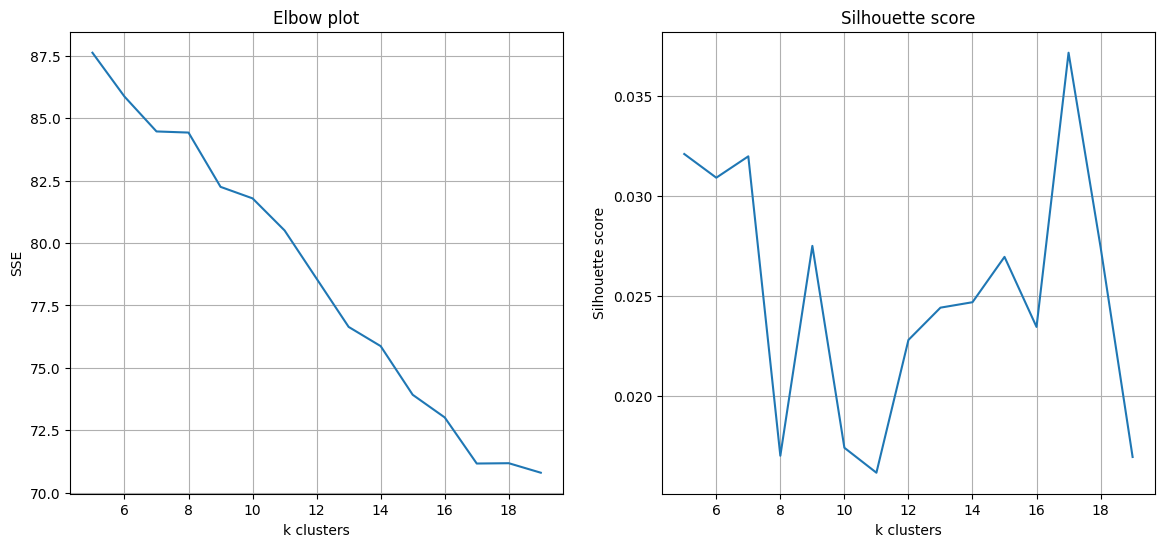

CPU times: user 1.22 s, sys: 290 ms, total: 1.51 s
Wall time: 1.44 s


In [118]:
%%time

k_range = range(5, 20)
plot_kmeans(st_embeddings, k_range)

### For UMAP embeddings

In [ ]:
## UMAP Embedding
umap_embeddings = umap.UMAP(n_components=2, metric='cosine').fit_transform(st_embeddings)

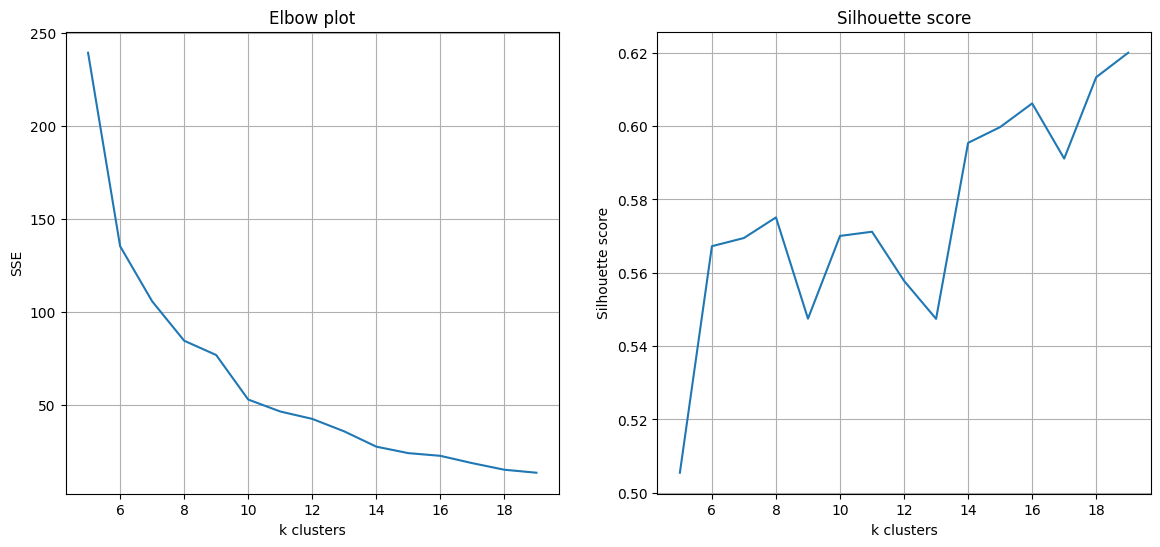

In [104]:
k_range = range(5, 20)
plot_kmeans(umap_embeddings, k_range)

### For t-SNE embeddings

In [ ]:
## t-SNE Embedding
tsne_embeddings = TSNE(n_components=2, metric='cosine').fit_transform(st_embeddings)

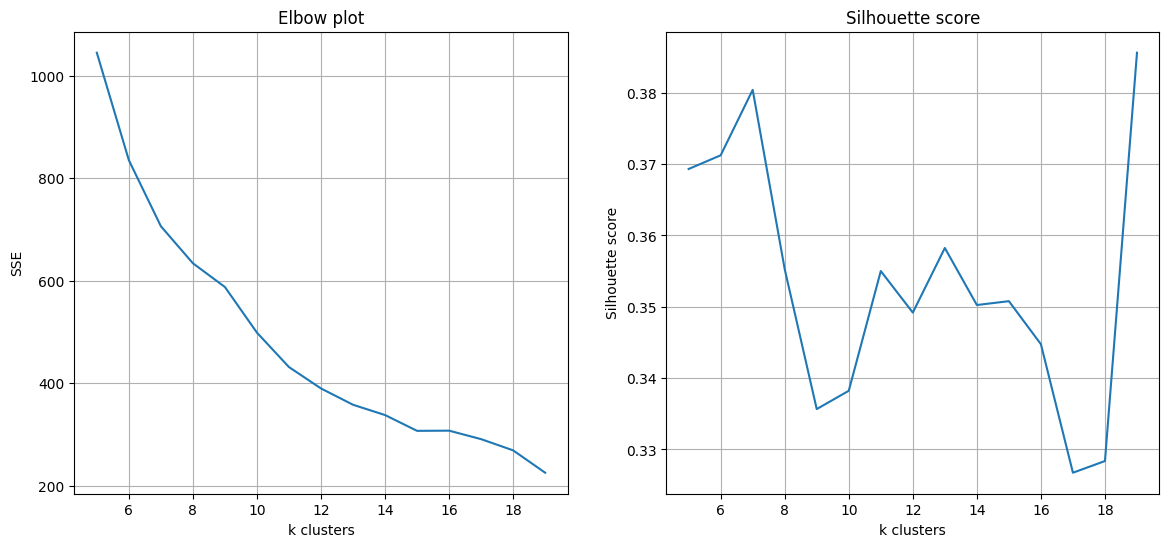

In [108]:
k_range = range(5, 20)
plot_kmeans(tsne_embeddings, k_range)

# UMAP+HDBSCAN
### Best parameter finding 

1. `generate_clusters` function:
   - Takes text embeddings and various hyperparameters as input.
   - Performs dimensionality reduction using UMAP.
   - Applies HDBSCAN clustering on the UMAP embeddings.
   - Returns the HDBSCAN clustering object.

2. `score_clusters` function:
   - Takes an HDBSCAN clustering object and a probability threshold.
   - Calculates the number of unique cluster labels (including noise).
   - Computes the cost, which is the fraction of data points with cluster assignment probability below the threshold.
   - Returns the label count and cost.

3. `random_search` function:
   - Performs a random search over the specified hyperparameter space.
   - For each evaluation, it generates clusters using `generate_clusters` and scores them using `score_clusters`.
   - Returns a pandas DataFrame with the results, including run ID, hyperparameters, label count, and cost.

4. `objective` function:
   - Serves as the objective function for the Bayesian hyperparameter search.
   - Generates clusters using the provided hyperparameters.
   - Scores the clusters and applies a penalty if the label count falls outside the desired range.
   - Returns the loss (cost + penalty), label count, and status.

5. `bayesian_search` function:
   - Performs Bayesian hyperparameter search using the `hyperopt` library.
   - Defines the search space for hyperparameters.
   - Calls the `objective` function to evaluate different hyperparameter combinations.
   - Returns the best hyperparameters, the corresponding HDBSCAN clustering object, and the trials object.

6. `combine_results` function:
   - Takes a DataFrame with ground truth labels and a dictionary of clustering models.
   - Adds columns to the DataFrame with the cluster labels assigned by each model.
   - Returns the combined DataFrame.

7. `plot_clusters` function:
   - Visualizes the HDBSCAN clusters using UMAP for dimensionality reduction.
   - Plots the clustered points with different colors and outliers as black triangles.
   - Creates a legend with discrete dots for each cluster.

The script also defines the hyperparameter search spaces and perform random and Bayesian searches on the `st_embeddings` data.

In [2]:
import pandas as pd

In [3]:
df = pd.read_json("part2.json")

In [51]:
st_embeddings = df["cleaned_text_nostopwords_embedding"].values.tolist()

In [52]:
import random
from functools import partial

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import hdbscan
import umap
# import tensorflow as tf
# import tensorflow_hub as hub
# from sentence_transformers import SentenceTransformer
from sklearn.metrics.cluster import normalized_mutual_info_score
from sklearn.metrics.cluster import adjusted_rand_score
from tqdm.notebook import trange
from hyperopt import fmin, tpe, hp, STATUS_OK, space_eval, Trials

In [53]:
def generate_clusters(message_embeddings,
                      n_neighbors,
                      n_components,
                      min_cluster_size,
                      min_samples = None,
                      random_state = None):
    """
    Returns HDBSCAN objects after first performing dimensionality reduction using UMAP

    Arguments:
        message_embeddings: embeddings to use
        n_neighbors: int, UMAP hyperparameter n_neighbors
        n_components: int, UMAP hyperparameter n_components
        min_cluster_size: int, HDBSCAN hyperparameter min_cluster_size
        min_samples: int, HDBSCAN hyperparameter min_samples
        random_state: int, random seed

    Returns:
        clusters: HDBSCAN object of clusters
    """

    umap_embeddings = (umap.UMAP(n_neighbors = n_neighbors,
                                n_components = n_components,
                                metric = 'cosine',
                                random_state=random_state)
                            .fit_transform(message_embeddings))

    clusters = hdbscan.HDBSCAN(min_cluster_size = min_cluster_size,
                               min_samples = min_samples,
                               metric='euclidean',
                               gen_min_span_tree=True,
                               cluster_selection_method='eom').fit(umap_embeddings)

    return clusters

In [54]:
def score_clusters(clusters, prob_threshold = 0.05):
    """
    Returns the label count and cost of a given clustering

    Arguments:
        clusters: HDBSCAN clustering object
        prob_threshold: float, probability threshold to use for deciding
                        what cluster labels are considered low confidence

    Returns:
        label_count: int, number of unique cluster labels, including noise
        cost: float, fraction of data points whose cluster assignment has
              a probability below cutoff threshold
    """

    cluster_labels = clusters.labels_
    label_count = len(np.unique(cluster_labels))
    total_num = len(clusters.labels_)
    cost = (np.count_nonzero(clusters.probabilities_ < prob_threshold)/total_num)

    return label_count, cost

In [55]:
def random_search(embeddings, space, num_evals):
    """
    Randomly search parameter space of clustering pipeline

    Arguments:
        embeddings: embeddings to use
        space: dict, contains keys for 'n_neighbors', 'n_components',
               and 'min_cluster_size' and values with
               corresponding lists or ranges of parameters to search
        num_evals: int, number of random parameter combinations to try

    Returns:
        df_result: pandas dataframe containing info on each evaluation
                   performed, including run_id, parameters used, label
                   count, and cost
    """

    results = []

    for i in trange(num_evals):
        n_neighbors = random.choice(space['n_neighbors'])
        n_components = random.choice(space['n_components'])
        min_cluster_size = random.choice(space['min_cluster_size'])
        random_state = space['random_state']

        clusters = generate_clusters(embeddings,
                                     n_neighbors=n_neighbors,
                                     n_components=n_components,
                                     min_cluster_size=min_cluster_size,
                                     random_state=random_state)

        label_count, cost = score_clusters(clusters, prob_threshold = 0.05)

        results.append([i, n_neighbors, n_components, min_cluster_size, label_count, cost])

    result_df = pd.DataFrame(results, columns=['run_id', 'n_neighbors', 'n_components',
                                               'min_cluster_size', 'label_count', 'cost'])

    return result_df.sort_values(by='cost')

In [56]:
def objective(params, embeddings, label_lower, label_upper):
    """
    Objective function for hyperopt to minimize

    Arguments:
        params: dict, contains keys for 'n_neighbors', 'n_components',
               'min_cluster_size', 'random_state' and
               their values to use for evaluation
        embeddings: embeddings to use
        label_lower: int, lower end of range of number of expected clusters
        label_upper: int, upper end of range of number of expected clusters

    Returns:
        loss: cost function result incorporating penalties for falling
              outside desired range for number of clusters
        label_count: int, number of unique cluster labels, including noise
        status: string, hypoeropt status

        """

    clusters = generate_clusters(embeddings,
                                 n_neighbors = params['n_neighbors'],
                                 n_components = params['n_components'],
                                 min_cluster_size = params['min_cluster_size'],
                                 random_state = params['random_state'])

    label_count, cost = score_clusters(clusters, prob_threshold = 0.05)

    #15% penalty on the cost function if outside the desired range of groups
    if (label_count < label_lower) | (label_count > label_upper):
        penalty = 0.15
    else:
        penalty = 0

    loss = cost + penalty

    return {'loss': loss, 'label_count': label_count, 'status': STATUS_OK}

In [57]:
def bayesian_search(embeddings, space, label_lower, label_upper, max_evals=100):
    """
    Perform bayesian search on hyperparameter space using hyperopt

    Arguments:
        embeddings: embeddings to use
        space: dict, contains keys for 'n_neighbors', 'n_components',
               'min_cluster_size', and 'random_state' and
               values that use built-in hyperopt functions to define
               search spaces for each
        label_lower: int, lower end of range of number of expected clusters
        label_upper: int, upper end of range of number of expected clusters
        max_evals: int, maximum number of parameter combinations to try

    Saves the following to instance variables:
        best_params: dict, contains keys for 'n_neighbors', 'n_components',
               'min_cluster_size', 'min_samples', and 'random_state' and
               values associated with lowest cost scenario tested
        best_clusters: HDBSCAN object associated with lowest cost scenario
                       tested
        trials: hyperopt trials object for search

        """

    trials = Trials()
    fmin_objective = partial(objective,
                             embeddings=embeddings,
                             label_lower=label_lower,
                             label_upper=label_upper)

    best = fmin(fmin_objective,
                space = space,
                algo=tpe.suggest,
                max_evals=max_evals,
                trials=trials)

    best_params = space_eval(space, best)
    print ('best:')
    print (best_params)
    print (f"label count: {trials.best_trial['result']['label_count']}")

    best_clusters = generate_clusters(embeddings,
                                      n_neighbors = best_params['n_neighbors'],
                                      n_components = best_params['n_components'],
                                      min_cluster_size = best_params['min_cluster_size'],
                                      random_state = best_params['random_state'])

    return best_params, best_clusters, trials

In [58]:
def combine_results(df_ground, cluster_dict):
    """
    Returns dataframe of all documents and each model's assigned cluster

    Arguments:
        df_ground: dataframe of original documents with associated ground truth
                   labels
        cluster_dict: dict, keys as column name for specific model and value as
                      best clusters HDBSCAN object

    Returns:
        df_combined: dataframe of all documents with labels from
                     best clusters for each model

    """

    df_combined = df_ground.copy()

    for key, value in cluster_dict.items():
        df_combined[key] = value.labels_

    return df_combined

In [59]:
import numpy as np
import pandas as pd
import umap
import hdbscan
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

def plot_clusters(embeddings, clusters, n_neighbors=15, min_dist=0.1):
    '''
    Plot HDBSCAN clusters
    Arguments:
        embeddings: sentence embeddings, array
        clusters: hdbscan clusters
        n_neighbors: int, UMAP hyperparameter n_neighbors
        min_dist: float, UMAP hyperparameter min_dist
    '''

    # Convert embeddings to a numpy array
    embeddings = np.array(embeddings)

    umap_data = umap.UMAP(n_neighbors=n_neighbors,
                          n_components=2,
                          min_dist=min_dist,
                          metric='cosine',
                          random_state=42).fit_transform(embeddings)

    point_size = 100.0 / np.sqrt(embeddings.shape[0])

    result = pd.DataFrame(umap_data, columns=['x', 'y'])
    result['labels'] = clusters.labels_

    fig, ax = plt.subplots(figsize=(10, 8))

    outliers = result.loc[result.labels == -1, :]
    clustered = result.loc[result.labels != -1, :]

    # Plot outliers as black triangles
    plt.scatter(outliers.x, outliers.y, color='black', s=point_size, alpha=0.5, marker='^', label='Outliers')

    # Plot clustered points as colored dots
    scatter = plt.scatter(clustered.x, clustered.y, c=clustered.labels, s=point_size, cmap='jet')

    # Create a legend with discrete dots for each cluster
    unique_labels = np.unique(clustered.labels)
    handles = [mpatches.Patch(color=plt.cm.jet(i / len(unique_labels)), label=f'Cluster {i}') for i in unique_labels]
    plt.legend(handles=handles, title='Clusters')

    plt.show()



In [60]:
clusters_default = generate_clusters(st_embeddings,
                                     n_neighbors = 15,
                                     n_components = 5,
                                     min_cluster_size = 10,
                                     random_state=42)

In [61]:
labels_def, cost_def = score_clusters(clusters_default)
print(labels_def)
print(cost_def)

4
0.5384615384615384


### 53.8 % considered as noise with default parameters

In [63]:
%%time

space = {
        "n_neighbors": range(12,16),
        "n_components": range(3,7),
        "min_cluster_size": range(2,16),
        "random_state": 42
    }

random_use = random_search(st_embeddings, space, 100)

  0%|          | 0/100 [00:00<?, ?it/s]

CPU times: user 2min 38s, sys: 753 ms, total: 2min 39s
Wall time: 3min 9s


In [64]:
random_use.head(25)

,run_id,n_neighbors,n_components,min_cluster_size,label_count,cost
5,5,12,6,2,12,0.153846
25,25,15,4,5,3,0.162393
90,90,12,4,3,4,0.170940
78,78,12,4,3,4,0.170940
97,97,12,3,7,3,0.188034
68,68,12,3,7,3,0.188034
99,99,12,3,2,16,0.205128
47,47,13,4,2,18,0.222222
10,10,14,5,2,15,0.222222
52,52,13,6,2,16,0.222222


In [65]:
hspace = {
    "n_neighbors": hp.choice('n_neighbors', range(3,16)),
    "n_components": 2,
    "min_cluster_size": hp.choice('min_cluster_size', range(2,16)),
    "random_state": 42
}

label_lower = 2
label_upper = 15
max_evals = 100

In [66]:
best_params_use, best_clusters_use, trials_use = bayesian_search(st_embeddings,
                                                                 space=hspace,
                                                                 label_lower=label_lower,
                                                                 label_upper=label_upper,
                                                                 max_evals=max_evals)

100%|██████████| 100/100 [02:18<00:00,  1.38s/trial, best loss: 0.0]
best:
{'min_cluster_size': 4, 'n_components': 2, 'n_neighbors': 5, 'random_state': 42}
label count: 2


In [68]:
best_params_use

{'min_cluster_size': 4,
 'n_components': 2,
 'n_neighbors': 5,
 'random_state': 42}

In [134]:
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score

# Calculate the silhouette score
silhouette_avg = silhouette_score(st_embeddings, best_clusters_use.labels_)
print("Silhouette Score:", silhouette_avg)

# Calculate the Davies-Bouldin index
db_index = davies_bouldin_score(st_embeddings, best_clusters_use.labels_)
print("Davies-Bouldin Index:", db_index)

# Calculate the Calinski-Harabasz index
ch_index = calinski_harabasz_score(st_embeddings, best_clusters_use.labels_)
print("Calinski-Harabasz Index:", ch_index)

Silhouette Score: 0.04812287504321715
Davies-Bouldin Index: 3.795505009109278
Calinski-Harabasz Index: 4.767768914931922
